<a href="https://colab.research.google.com/github/oceanfourteen/new/blob/main/Project_7_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependencies

In [52]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

Data collection and procesing

In [53]:
#loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [54]:
#inspecting the first five rows of the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [55]:
#checking the nmber of rows and columns
car_dataset.shape

(301, 9)

In [56]:
#getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [57]:
#checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [58]:
#checking the distribution of categorical data
car_dataset.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [59]:
car_dataset.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [60]:
car_dataset.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

Encoding the categorical data

In [61]:
#encoding the "Fuel_Type" column
car_dataset.replace({'Fuel_Type':{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)

#encoding the "Seller_Type" column
car_dataset.replace({'Seller_Type':{"Individual":1,"Dealer":0}},inplace=True)

#encoding the "Transmission" column
car_dataset.replace({"Transmission":{"Automatic":1,"Manual":0}},inplace=True)

In [62]:
car_dataset.Seller_Type.value_counts()

0    195
1    106
Name: Seller_Type, dtype: int64

In [63]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into training and test data

In [64]:
X = car_dataset.drop(["Selling_Price","Car_Name"],axis=1)
Y = car_dataset["Selling_Price"]

In [65]:
print(X)


     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [66]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting training and test data


In [67]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

Model Training

1) Linear Regression

In [68]:
#loading the linear regression model
lin_reg_model = LinearRegression()

In [69]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [91]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)
training_accuracy_score = r2_score(Y_train,training_data_prediction)
print("R Squared Error : ",training_accuracy_score)

R Squared Error :  0.8799451660493711


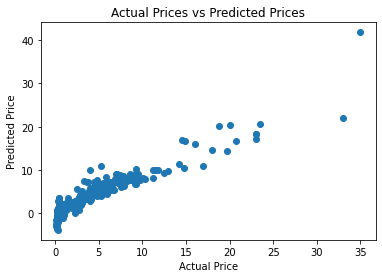

In [83]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [90]:
#prediction on testing data
testing_data_prediction = lin_reg_model.predict(X_test)
testing_accuracy_score = r2_score(Y_test,testing_data_prediction)
print("R Squared Error : ",testing_accuracy_score)

R Squared Error :  0.8365766715027051


Visualize the actual prices and Predicted prices

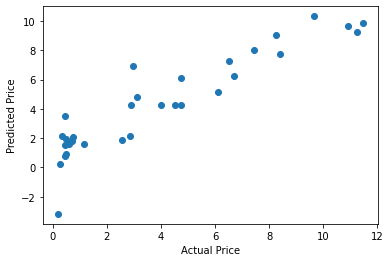

In [85]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

2) Lasso Regression

In [87]:
las_reg_model = Lasso()

In [89]:
las_reg_model.fit(X_train,Y_train)

Lasso()

Analysing the model

In [92]:
# prediction on training data
training_data_prediction = las_reg_model.predict(X_train)
training_accuracy_score = r2_score(Y_train,training_data_prediction)
print("R square accuracy : ",training_accuracy_score)

R square accuracy :  0.8427856123435794


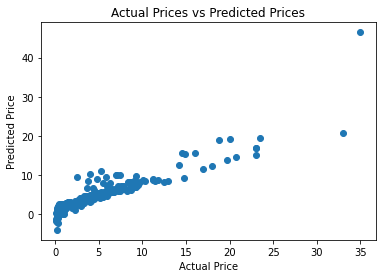

In [95]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [94]:
#prediction on testing data
testing_data_prediction = las_reg_model.predict(X_test)
testing_accuracy_score = r2_score(Y_test,testing_data_prediction)
print("R square accuracy : ",testing_accuracy_score)

R square accuracy :  0.8709167941173195


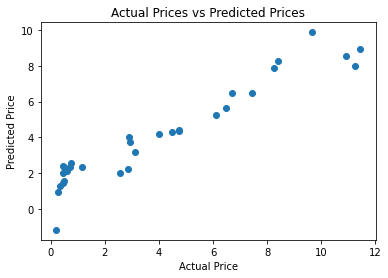

In [96]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()